# Задание по анализу данных

#### Группа: 530повс
#### Фамилия, имя: Демьянов Иван

## Импорт библиотек, загрузка и предобработка данных, предварительный анализ

### Импорт библиотек

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

### Загрузка данных, предварительный анализ

In [2]:
data = pd.read_csv('bank_dataset_hash.csv', encoding='cp1251', sep=';')
data.head(10)

,snapshot_dt,agreement,customer,f_triggered,a76154d74182dbdbe69cc30b71b94709,713bc35ae4a64ec4790712ab3ff2e7b0,142642bce57cac3a54f26d9c4a4ea164,64879933ebbcd196512dd71dede1b7fc,41b8f61fa021d3421510284f8e8ed8e6,d70cf72daf09e847b9d98f5cd110e874,...,b62f1cae6504d09ae4456042bc924802,cbdcd5b4417b44615f4205f532c09bf8,de41cfed08599c3ed288a56edcc5c768,7218c484a45b5cf830285bff9b436a9e,9a97b46bc29290671213a1d7f21016b9,8ce7e1924c8891f9ca267c926a71d4ad,7e9b2e50b011024e81f5c646fb436e28,bb496ecdfaf5fc8772d00ae34048ec29,5a105e8b9d40e1329780d62ea2265d8a,ad0234829205b9033196ba818f7a872b
0,1525132800,243994109,24006620,0,0,-1,0,018,0,-1,...,018,0,-1,0.0,-1,1.0,-1,NaN,1,1
1,1543622400,360081744,219930273,0,1,"0,159903995",0,01A,"21,62523364",-1,...,01C,0,-1,0.0,-1,0.0,-1,NaN,0,1
2,1535760000,163557019,22068418,0,inf,"0,994352347",0,01A,"12,21153846",-1,...,019,0,-1,0.0,-1,0.0,-1,NaN,1,1
3,1551398400,381683214,262085392,0,0,inf,"1,612903226",NaN,0,-1,...,NaN,0,-1,0.0,"0,8",0.0,-1,0.0,2,2
4,1533081600,117405311,86867150,0,inf,"3,092404128","19,20700855",017,0,-1,...,01B,0,0,0.0,-1,0.0,0,NaN,3,1
5,1538352000,212751282,37594210,0,NaN,-1,NaN,018,NaN,-1,...,01C,NaN,-1,NaN,NaN,NaN,-1,NaN,3,0
6,1543622400,126633119,86774156,0,NaN,-1,NaN,017,NaN,"0,1",...,019,NaN,"0,896028831",NaN,NaN,NaN,"-416,31",NaN,3,2
7,1546300800,63808081,22843245,0,inf,inf,0,017,0,-1,...,018,0,-1,0.0,-1,0.0,0,0.0,1,2
8,1527811200,190815131,28338016,0,"0,5","0,298048421",0,018,0,-1,...,019,0,-1,0.0,-1,0.0,-1,NaN,1,0
9,1527811200,329317111,90549998,0,2,-1,0,01A,0,-1,...,01C,0,-1,0.0,-1,0.0,-1,NaN,0,0


In [3]:
data.describe()

,snapshot_dt,agreement,customer,f_triggered,47b359b06b472245ebf392f89c1984d9,d1e92bd0813153b4426efe76c284962a,96ac93b9d41855f8f4154d101b7eec8f,60678ed309bcdf3a7f66c3c0eaaa1008,3ab7560edc855076c9f82a1d067260ac,713c06ee08e923ef1deb2b49e6412d08,...,1674cc7109143930d7062cf2bd15bc7a,56b9387690aec4bea7c0ead0cd2e24f7,0ca8d1267d125b2168c4d63e02f5af1e,3c267b3313e203bfca261907cbeda7f9,fc0ded9709cc8e822e4e3d5fd6e0eec2,b595cbe5ed2d1a3b983c039ae8ff405f,8ce7e1924c8891f9ca267c926a71d4ad,bb496ecdfaf5fc8772d00ae34048ec29,5a105e8b9d40e1329780d62ea2265d8a,ad0234829205b9033196ba818f7a872b
count,1.003660e+05,1.003660e+05,1.003660e+05,100366.000000,15486.000000,15486.000000,1620.000000,1620.000000,1813.000000,1813.000000,...,100366.000000,100360.000000,15486.0,1620.00000,1620.000000,100169.000000,70705.000000,15486.000000,100366.000000,100366.000000
mean,1.535857e+09,2.325078e+08,9.893900e+07,0.020007,0.116557,0.000258,0.151235,-0.091975,46.217871,0.024821,...,1.109310,16.700717,0.0,0.05679,0.008025,-0.272619,0.814440,0.000258,1.499063,0.998894
std,9.898409e+06,1.043782e+08,6.053773e+07,0.140024,0.425732,0.016070,0.964454,0.289080,33.732513,0.165920,...,1.043677,0.457946,0.0,1.26207,0.438212,0.950576,1.926568,0.016070,1.117888,0.816319
min,1.519862e+09,2.972487e+07,2.075046e+07,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.000000,0.000000,...,-1.000000,16.000000,0.0,-1.00000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.527811e+09,1.543954e+08,4.514291e+07,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,...,0.000000,16.000000,0.0,0.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.535760e+09,2.317229e+08,8.740546e+07,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,...,1.000000,17.000000,0.0,0.00000,0.000000,-1.000000,0.000000,0.000000,2.000000,1.000000
75%,1.543622e+09,3.382547e+08,1.350023e+08,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,...,2.000000,17.000000,0.0,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,1.551398e+09,3.980932e+08,2.908694e+08,1.000000,10.000000,1.000000,11.000000,0.000000,166.000000,2.000000,...,49.000000,17.000000,0.0,38.00000,1.000000,9.000000,28.000000,1.000000,3.000000,2.000000


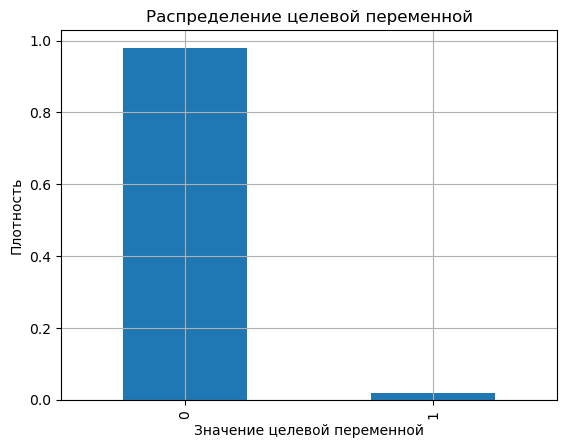

In [4]:
data.f_triggered.value_counts(normalize=True).plot(kind='bar');
plt.title("Распределение целевой переменной")
plt.xlabel("Значение целевой переменной")
plt.ylabel("Плотность")
plt.grid()

По распределению целевой переменной и названию датасета можно прийти к выводу, что целевая метка - довольно редкое банковское событие, например, взятие кредита.

Помимо целевой переменной также доступны следующие незакодированные признаки:
* snapshot_dt - временной срез, за который брались данные
* agreement - идентификатор соглашения
* customer - идентификатор клиента

In [5]:
for column in ["snapshot_dt", "agreement", "customer"]:
    print(f"Процент уникальных значений признака {column} --- {data[column].nunique() / data.shape[0] * 100:.2f}%")

Процент уникальных значений признака snapshot_dt --- 0.01%
Процент уникальных значений признака agreement --- 100.00%
Процент уникальных значений признака customer --- 100.00%


Поскольку процент уникальных значений идентификаторов клиента и соглашения максимален, то в рамках текущей работы эти признаки не будут использованы для обучения моделей, однако в будущем они могут быть полезны, к примеру, при повторном обращении клиента.

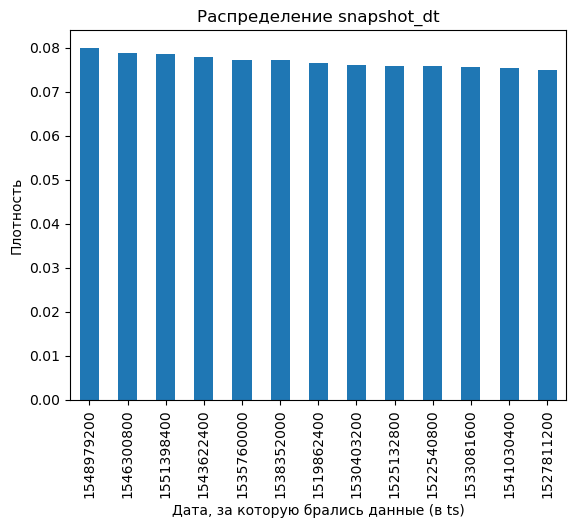

In [6]:
data.snapshot_dt.value_counts(normalize=True).plot(kind='bar')
plt.title("Распределение snapshot_dt")
plt.xlabel("Дата, за которую брались данные (в ts)")
plt.ylabel("Плотность");

Распределение временной метки очень похоже на равномерное $=>$ можно использовать определенное значение в качестве порогового для валидации моделей. По этой причине данный признак также не будет задействован в обучении, хотя в перспективе из временной метки модель может извлечь определенные зависимости человеческого поведения.

### Предобработка данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100366 entries, 0 to 100365
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   snapshot_dt                       100366 non-null  int64  
 1   agreement                         100366 non-null  int64  
 2   customer                          100366 non-null  int64  
 3   f_triggered                       100366 non-null  int64  
 4   a76154d74182dbdbe69cc30b71b94709  70705 non-null   object 
 5   713bc35ae4a64ec4790712ab3ff2e7b0  100169 non-null  object 
 6   142642bce57cac3a54f26d9c4a4ea164  70705 non-null   object 
 7   64879933ebbcd196512dd71dede1b7fc  100197 non-null  object 
 8   41b8f61fa021d3421510284f8e8ed8e6  70705 non-null   object 
 9   d70cf72daf09e847b9d98f5cd110e874  100169 non-null  object 
 10  47b359b06b472245ebf392f89c1984d9  15486 non-null   float64
 11  a4fc43c630d53f6b4fc24dcea3cdfdd6  1620 non-null    o

Исходные данные представлены в различных типах,

также некоторые колонки содержат бесконечные значения($\pm$ inf) и неопределенные значения(NaN)

Для колонок с типами int64 и float64 избавимся от бесконечных значений, заменив их на максимальное и минимальное значение в соответствующей колонке. Также предположительно разделим признаки на две группы:
* категориальные(object)
* числовые(int64, float64)

In [8]:
cat_features, num_features = [], []

for column in data.columns[4:]:

    if data[column].dtype != "object":
        data[column] = data[column].astype(str)
        data[column] = data[column].apply(lambda x: x.replace(',', '.'))
        data[column] = pd.to_numeric(data[column], errors='coerce')
        arr = (data[column]!= np.inf) & (data[column]!= -np.inf)
        data[column].replace(np.inf, data[column][arr].max(), inplace=True)
        data[column].replace(-np.inf, data[column][arr].min(), inplace=True)
        data[column] = data[column].astype(np.float64)
        num_features.append(column)
    else:
        data[column] = data[column].astype(str)

cat_features = [column for column in data.columns[4:] if column not in num_features]

## Обработка данных, разделение на обучение и валидацию

### Разделение данных на обучение и валидацию

Реализуем идею из прошлого раздела: выберем пороговое значение, которое будет отделять «прошлое» для нашей модели от «будущего», на котором будем валидироваться. Это довольно логично, поскольку мы хотим построить модель, которая на основании текущей информации, способна хорошо предсказывать будущее.

In [9]:
threshold_value = sorted(data.snapshot_dt.unique())[-3]

test_data = data[data["snapshot_dt"] > threshold_value]
train_data = data[data["snapshot_dt"] <= threshold_value]

y_train = train_data.pop("f_triggered")
y_test = test_data.pop("f_triggered")

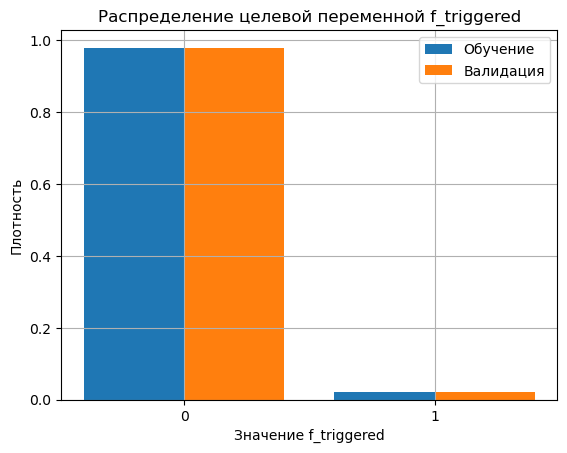

In [10]:
labels = [0, 1]
p_y_train = y_train.value_counts(normalize=True).tolist()
p_y_test = y_test.value_counts(normalize=True).tolist()

x_axis = np.arange(len(labels))
  
plt.bar(x_axis - 0.2, p_y_train, 0.4, label = 'Обучение')
plt.bar(x_axis + 0.2, p_y_test, 0.4, label = 'Валидация')
  
plt.xticks(x_axis, labels) 
plt.xlabel("Значение f_triggered")
plt.ylabel("Плотность") 
plt.title("Распределение целевой переменной f_triggered") 
plt.legend()
plt.grid()
plt.show()

Выше представлено сравнение распределений целевой переменной на данных из обучения и валидации. По виду распределений можно прийти к выводу, что $KL$-дивергенция будет довольно маленькой между ними, следовательно, такой способ разделения данных вполне неплохо подходит для оценки качества модели.

### Обработка данных

In [11]:
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()
            )
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore')
            )
        ]), cat_features
        )
    ]
)

X_train = preprocessor.fit_transform(train_data)
X_test = preprocessor.transform(test_data)


## Обучение и выбор модели

Очевидно, что градиентный бустинг является SOTA-решением применимо к табличным данным, поэтому финальная модель заранее будет с ним, однако также оценим качество и других моделей:

* KNN
* Logistic Regression
* SVM
* Random Forest

In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score

In [13]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print(f"KNN Gini: {2 * roc_auc_score(y_test, KNN.predict_proba(X_test)[:, 1]) - 1}")

KNN Gini: 0.13774091143964706


In [14]:
Log_Reg = LogisticRegression(max_iter=1000, random_state=42)
Log_Reg.fit(X_train, y_train)
print(f"Log_Reg Gini: {2 * roc_auc_score(y_test, Log_Reg.predict_proba(X_test)[:, 1]) - 1}")

Log_Reg Gini: 0.6837362360756238


In [15]:
SVM = SVC(probability=True, gamma='auto', max_iter=100, random_state=42)
SVM.fit(X_train, y_train)
print(f"SVM Gini: {2 * roc_auc_score(y_test, SVM.predict_proba(X_test)[:, 1]) - 1}")

SVM Gini: 0.10494783339915226


In [16]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
print(f"RF Gini: {2 * roc_auc_score(y_test, RF.predict_proba(X_test)[:, 1]) - 1}")

RF Gini: 0.45043214063174286


In [17]:
CB = CatBoostClassifier(4000, max_depth=6, learning_rate=1e-3)
CB.fit(X_train, y_train, verbose=False)
print(f"GB Gini: {2 * roc_auc_score(y_test, CB.predict_proba(X_test)[:, 1]) - 1}")

GB Gini: 0.6851936976447599


### Fine-tuning для бустинга

In [18]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

# define the search space for the hyperparameters
search_space = {'learning_rate': hp.uniform('learning_rate', 1e-3, 0.5),
                'iterations': hp.randint('iterations',100,2000),
                'l2_leaf_reg': hp.randint('l2_leaf_reg',1,10),
                'depth': hp.randint('depth',1,8),
                'bootstrap_type' : hp.choice('bootstrap_type', ['Bayesian', 'Bernoulli'])
               }

def objective(search_space):
    model = CatBoostClassifier(**search_space,
                              early_stopping_rounds=100,
                              random_seed=42)
    
    model.fit(X = X_train, y = y_train, eval_set=(X_test, y_test), verbose=False)
    return {'loss': model.get_best_score()['validation']['Logloss'], 'status': STATUS_OK}

In [19]:
# bayesian algorithm
algorithm=tpe.suggest

# search for best parameters
best_params = fmin(
    fn=objective,
    space=search_space,
    algo=algorithm,
    max_evals=10)

100%|████████| 10/10 [04:58<00:00, 29.83s/trial, best loss: 0.08142900288611815]


In [20]:
best_params

{'bootstrap_type': 1,
 'depth': 6,
 'iterations': 546,
 'l2_leaf_reg': 6,
 'learning_rate': 0.15740164203614163}

In [21]:
best_params.pop("bootstrap_type")

1

In [22]:
best_params

{'depth': 6,
 'iterations': 546,
 'l2_leaf_reg': 6,
 'learning_rate': 0.15740164203614163}

In [23]:
CB_tuned = CatBoostClassifier(**best_params)
CB_tuned.fit(X_train, y_train, verbose=False)
print(f"CB_tuned Gini: {2 * roc_auc_score(y_test, CB_tuned.predict_proba(X_test)[:, 1]) - 1}")

CB_tuned Gini: 0.6884435940979168


Вау, результат поразил) Даже 10 эпох тюнинга сделали свое дело, немного увеличив метрику Джини))
К сожалению, на дальнейший тюнинг времени не остается, поэтому этот пункт будет как напутствие к дальнейшему улучшению и подтверждение того, что hyperopt - это очень хороший инструмент для fine-tuning'а моделей

### Эксперименты с усреднением предсказаний различных моделей

Некоторые модели показали себя вполне неплохо(логистическая регрессия), поэтому, предполагаю, будет уместно посмотреть на метрику Джини усредненного предсказания вероятностей/предсказания с весами

In [24]:
print(f"LR+CB Gini: {2 * roc_auc_score(y_test,(Log_Reg.predict_proba(X_test)[:, 1] + CB.predict_proba(X_test)[:, 1])/2) - 1}")
print(f"LR+CB_tuned Gini: {2 * roc_auc_score(y_test,(Log_Reg.predict_proba(X_test)[:, 1] + CB_tuned.predict_proba(X_test)[:, 1])/2) - 1}")
print(f"KNN+CB Gini: {2 * roc_auc_score(y_test,(KNN.predict_proba(X_test)[:, 1] + CB.predict_proba(X_test)[:, 1])/2) - 1}")
print(f"SVM+CB Gini: {2 * roc_auc_score(y_test,(SVM.predict_proba(X_test)[:, 1] + CB.predict_proba(X_test)[:, 1])/2) - 1}")
print(f"SVM+LR Gini: {2 * roc_auc_score(y_test,(SVM.predict_proba(X_test)[:, 1] + Log_Reg.predict_proba(X_test)[:, 1])/2) - 1}")

LR+CB Gini: 0.7046618533044307
LR+CB_tuned Gini: 0.7047316233504541
KNN+CB Gini: 0.6252317396659868
SVM+CB Gini: 0.5328664136827925
SVM+LR Gini: 0.5522254813699523


По результатам экспериментов с усреднением можно однозначно сказать, что оно способно улучшить метрику Джини, так как предсказание учитывает в себе логику двух моделей(например, LR+CB учитывает вероятностный подтекст логистической регрессии и ансамблевый алгоритм). Далее проведу эксперимент со взвешиванием..

In [25]:
print(f"weighted LR+CB Gini: {2 * roc_auc_score(y_test, 0.4*Log_Reg.predict_proba(X_test)[:, 1] + 0.6*CB.predict_proba(X_test)[:, 1]) - 1}")

weighted LR+CB Gini: 0.7053229341272471


Данный эксперимент тоже себя оправдал: взвешенная сумма гораздо робастнее обычного усреднения, поэтому можно, к примеру, подбирать веса с учетом качества моделей.

## Выводы

* В данном ноутбуке был проведен анализ банковских данных и предложена идея их предобработки для дальнейшего использования моделями машинного обучения. Также была приведена стратегия разбиения данных на обучение и валидацию с демонстрацией визуального сходства распределений целевой переменной. Замечание: уместнее было бы назвать переменные следующим образом: X_test -> X_val, y_test -> y_val, однако это не так важно и, очевидно, не скажется на метриках.

* Реализован пайплайн, который обрабатывает данные. Метрики качества моделей весьма устраивают, но в дополнение к текущей работе можно(если бы было больше времени) попробовать различные варианты обработки данных. Например, RobustScaler для шкалирования числовых признаков 

* Приведено сравнение моделей на преобразованных данных: бустинг показал лучший результат, так как это SOTA для табличных данных. Также приятно удивила логистическая регрессия, которая показала сравнимое с бустингом качество без особого подбора параметров и с довольно скромным временем обучения

* Проведен мини-тюнинг бустинга при помощи библиотеки hyperopt, который показал, что это хорошая инициатива, если есть желание улучшить метрики качества для бустинга

* Проведены эксперименты с усреднением вероятностей и взвешенной суммой, которые также показали, что это хорошая идея для дальнейших улучшений :)